# Load libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
from sklearn import tree

### Load dataset

In [2]:
pima = pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Split dataset into target/response and train/test

In [3]:
feature_cols = pima.columns
X = pima[feature_cols[:-2]] # Features
y = pima.Outcome # Target variable

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Create classifiers, train, and predict on test set

In [5]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

clf2 = DecisionTreeClassifier(criterion = "entropy")
clf2 = clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

### Evaluate based on accuracy

In [6]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy (CART):",metrics.accuracy_score(y_test, y_pred))
print("Accuracy (ID3):",metrics.accuracy_score(y_test, y_pred2))

Accuracy (CART): 0.6493506493506493
Accuracy (ID3): 0.6796536796536796


### Visualize trees using MatPlotLib

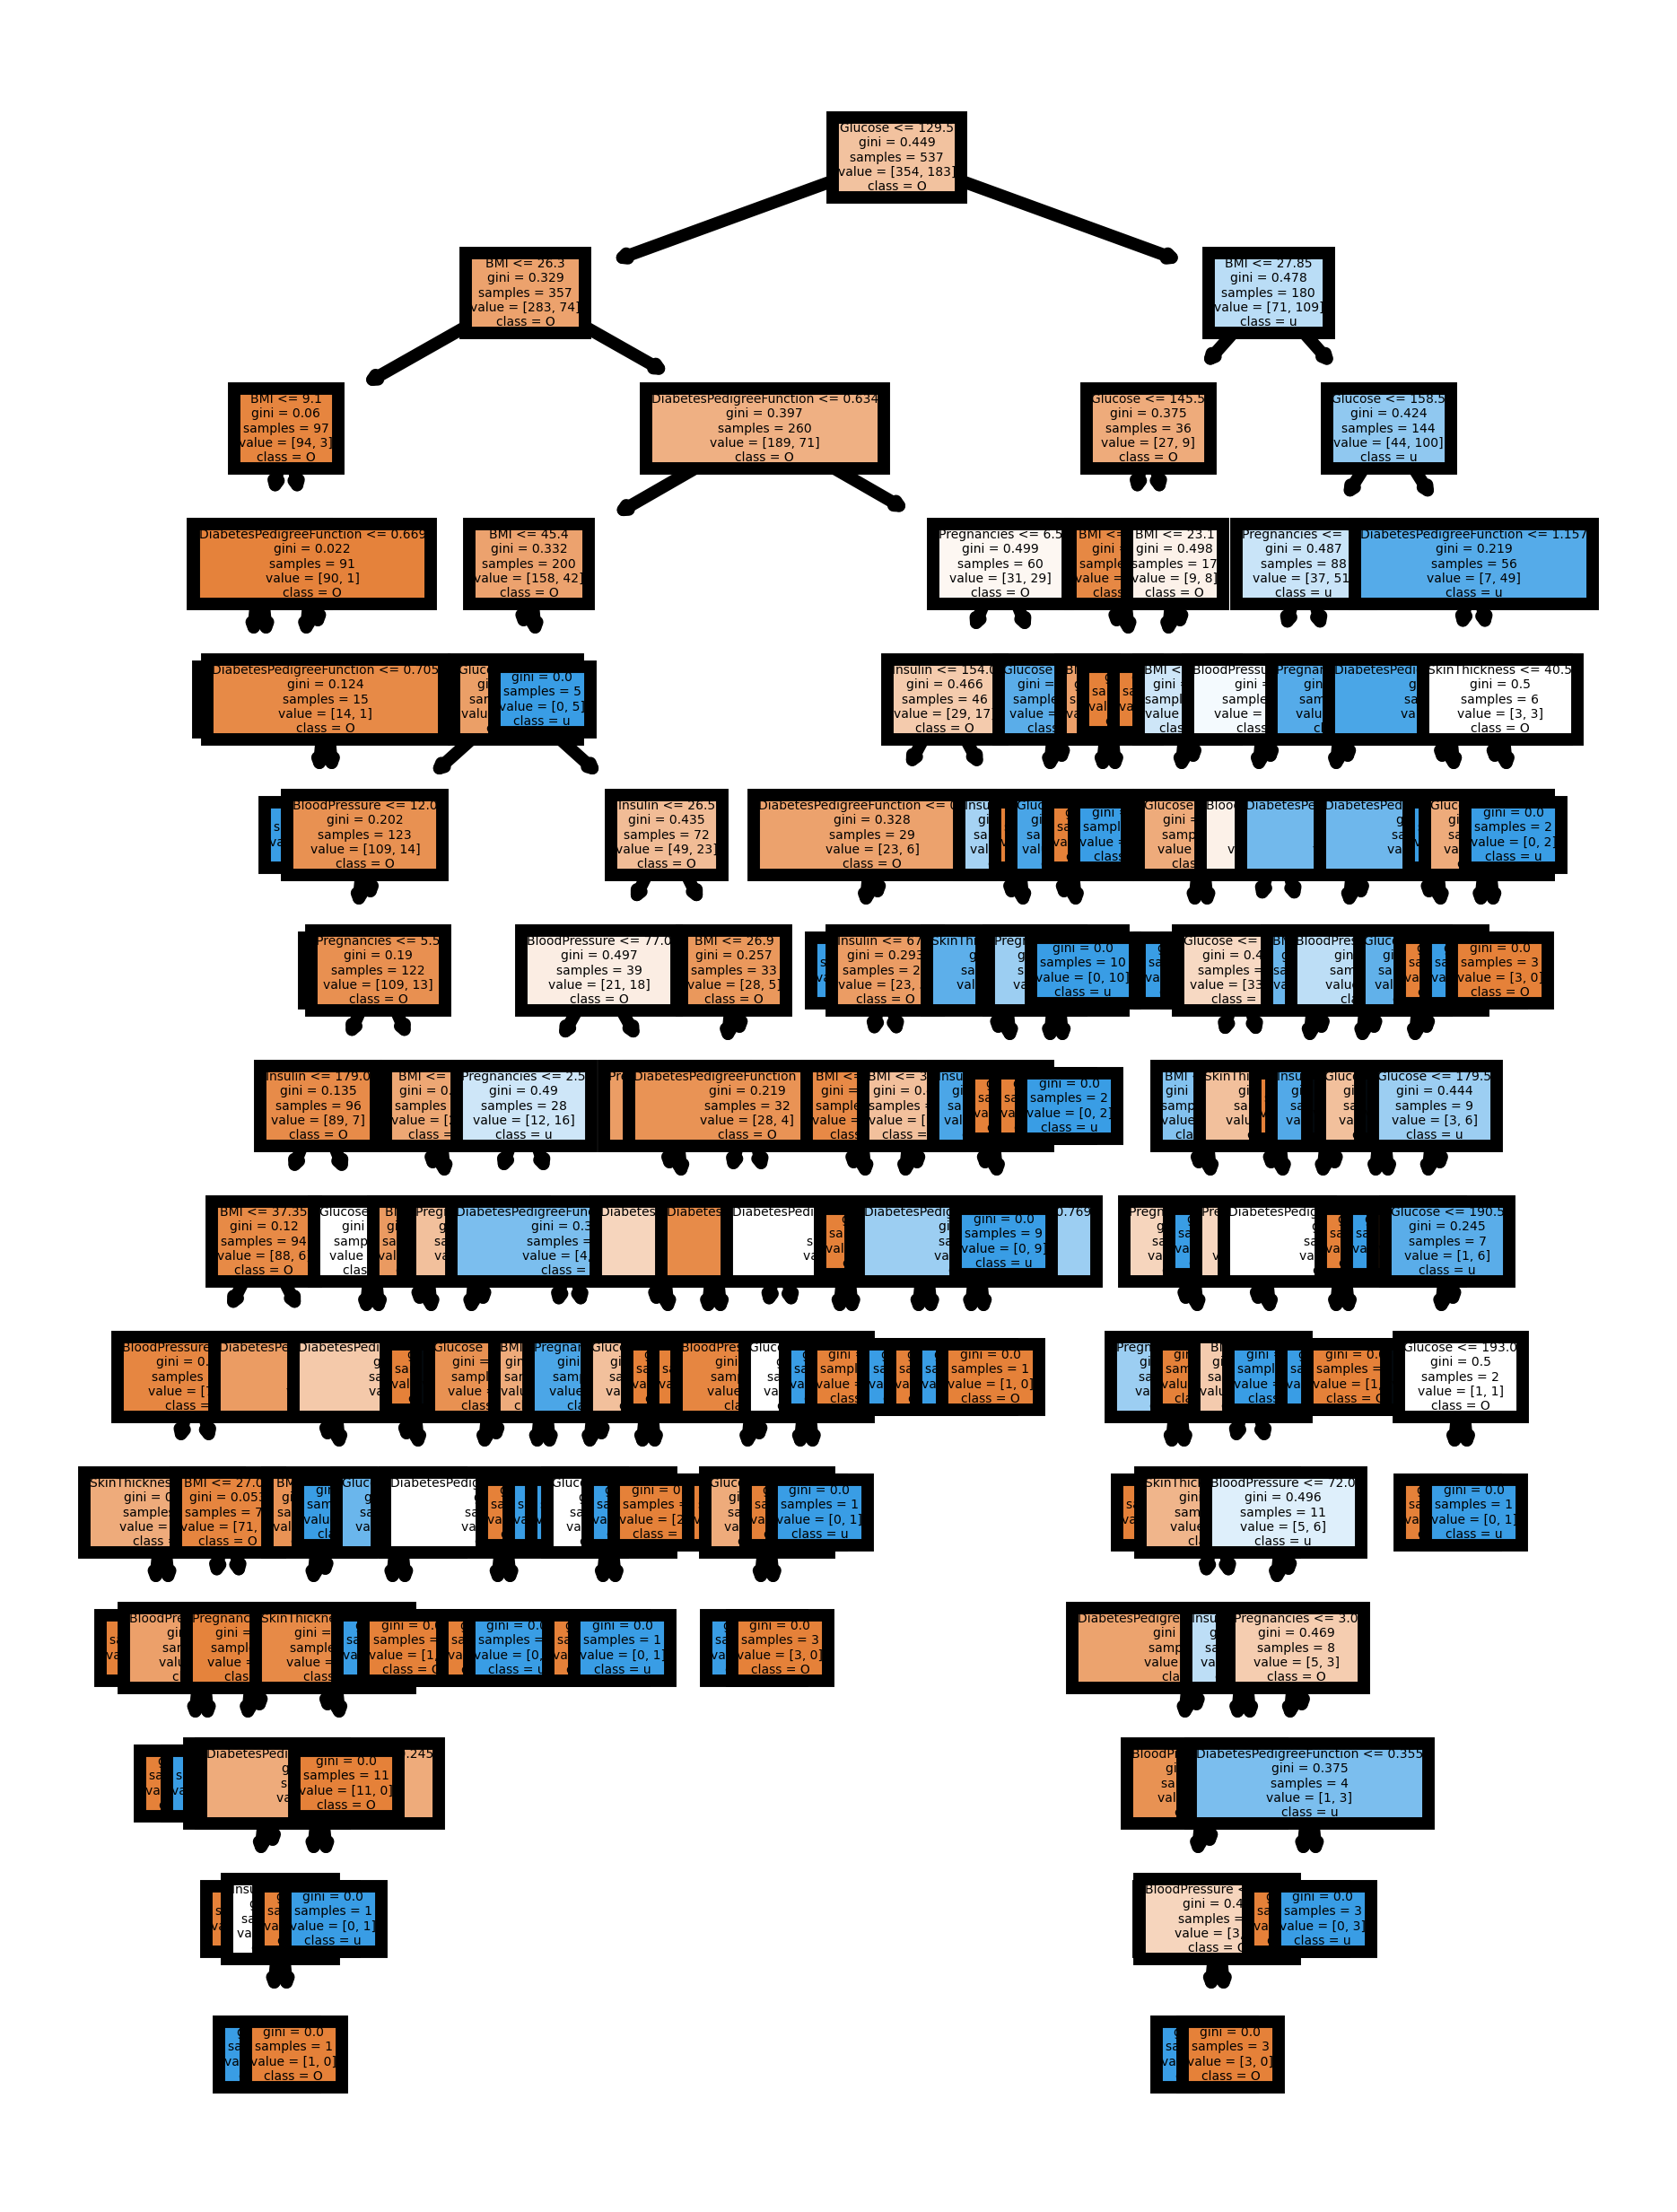

In [7]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,3), dpi=1000)

tree.plot_tree(clf,
           feature_names = feature_cols[:-2], 
           class_names=feature_cols[-1],
           filled = True);

fig.savefig('imagename.png')

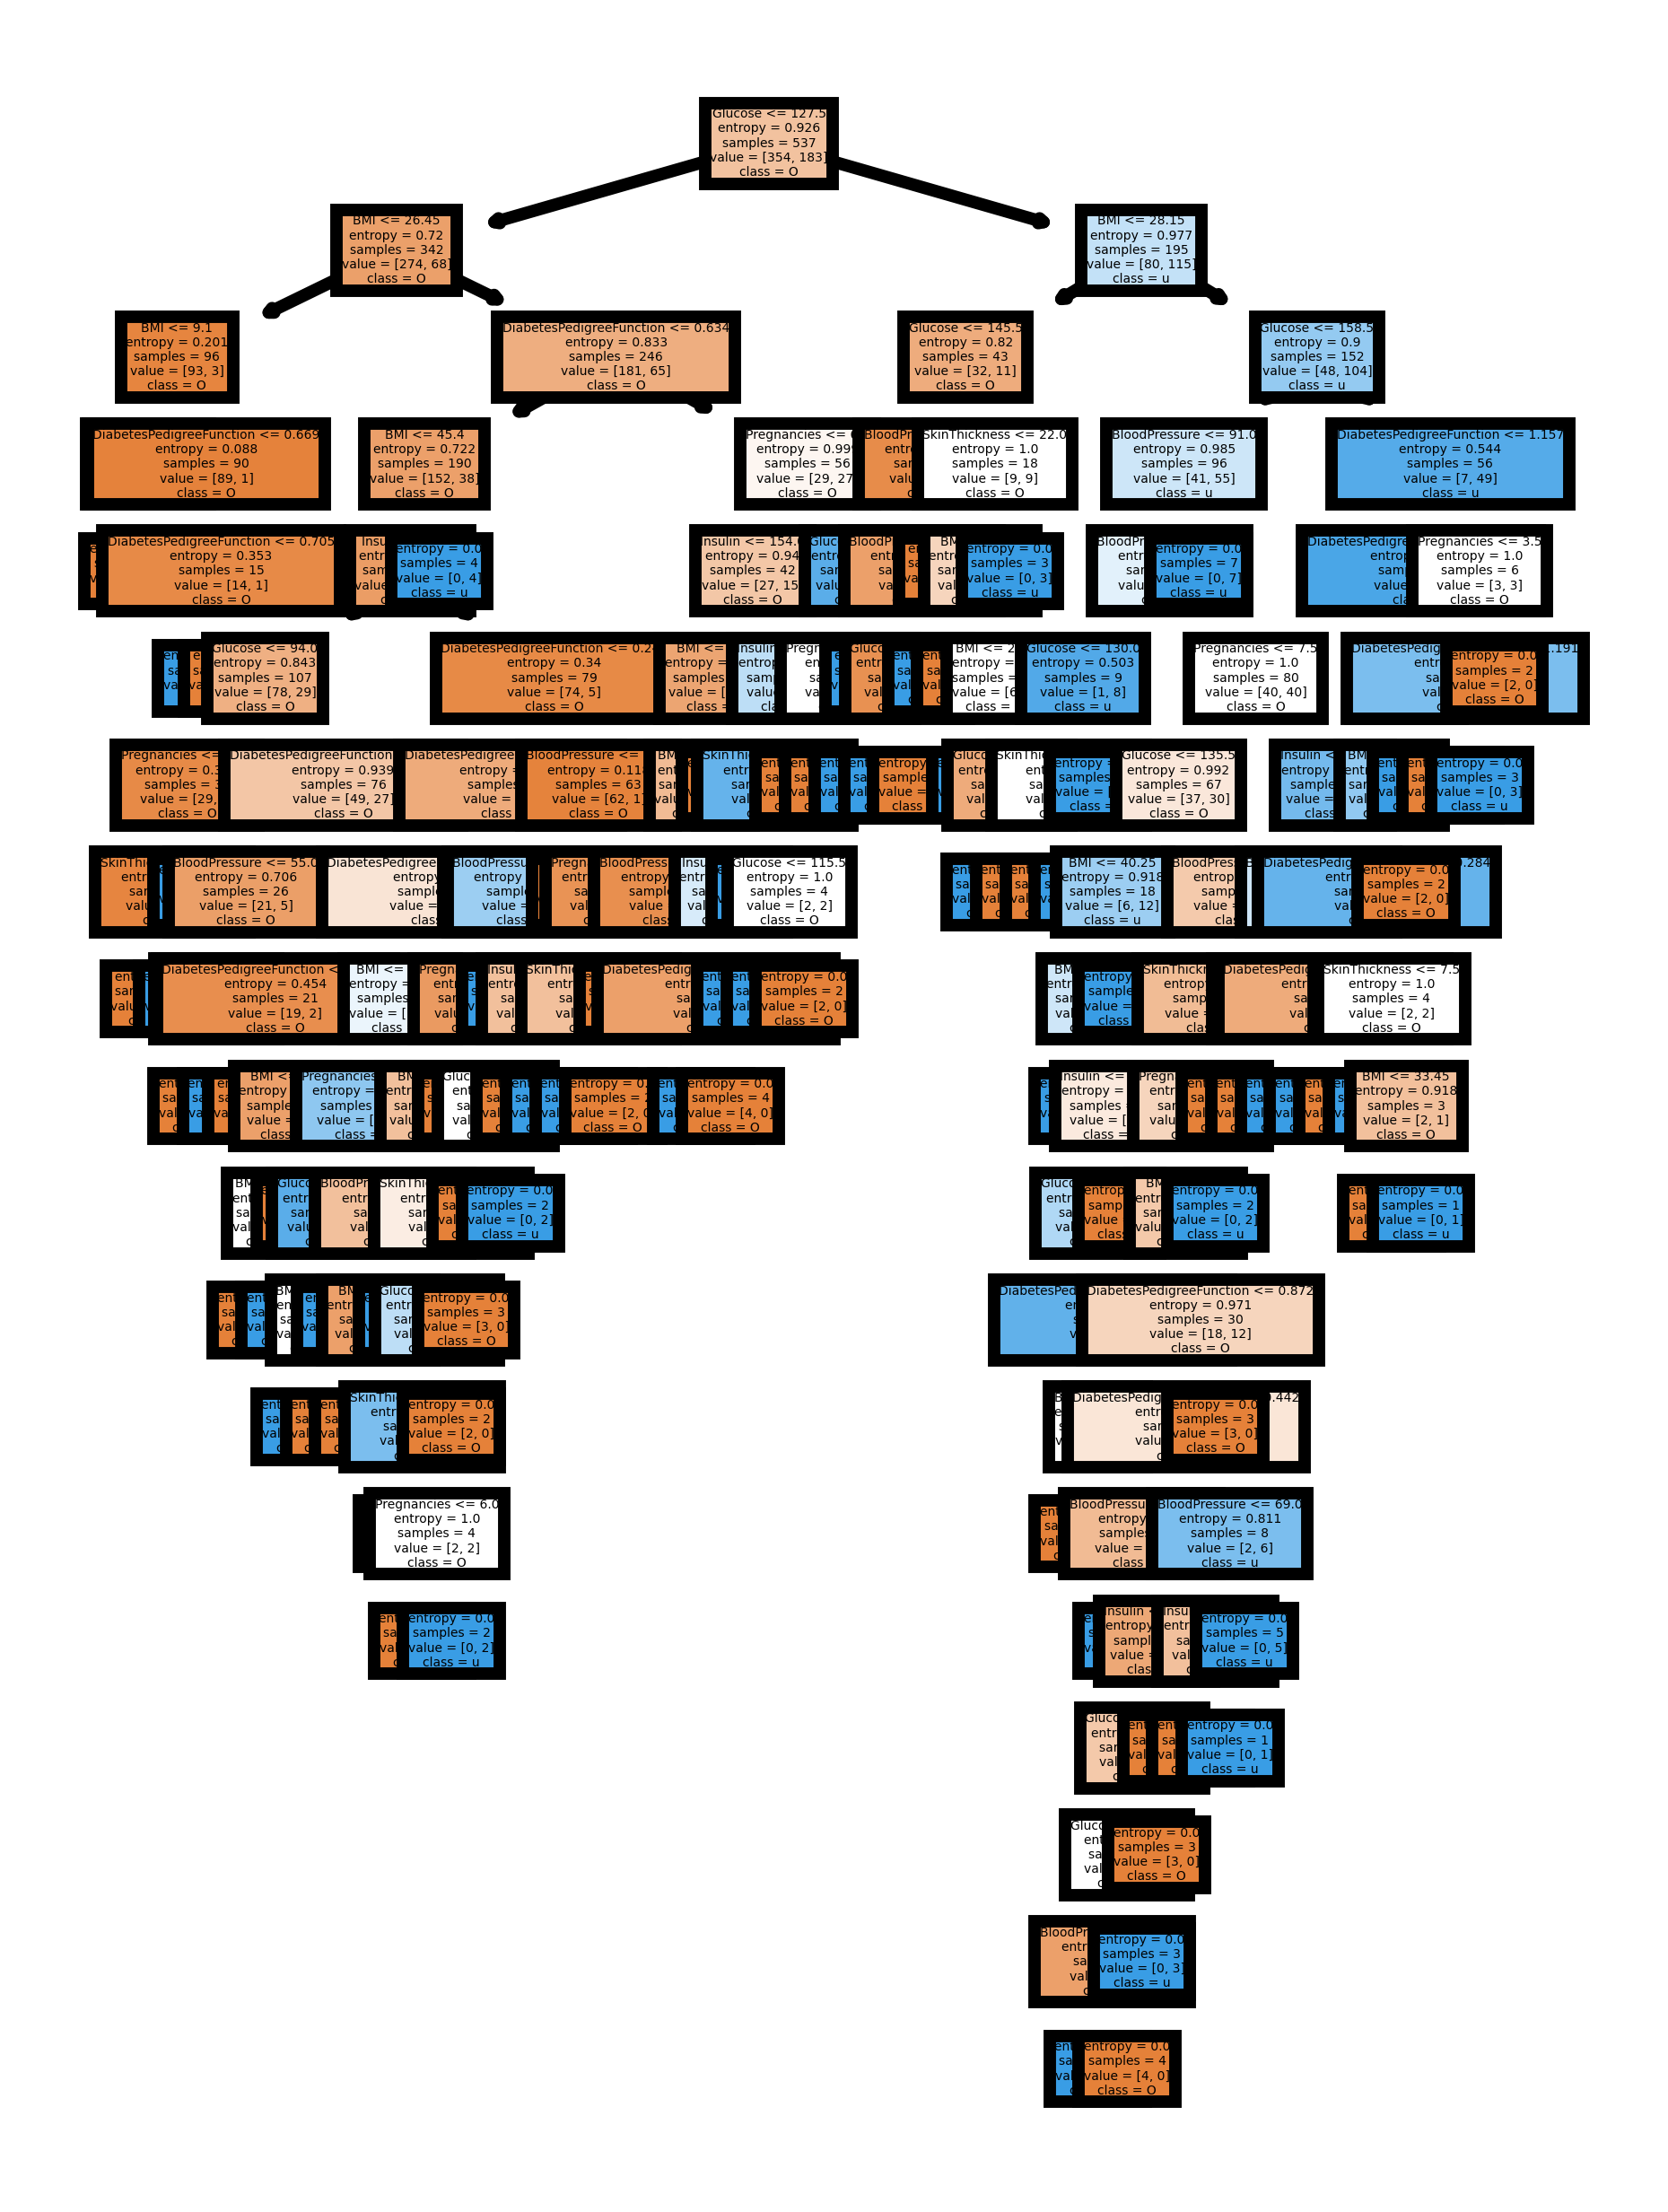

In [8]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,3), dpi=1000)

tree.plot_tree(clf2,
           feature_names = feature_cols[:-2], 
           class_names=feature_cols[-1],
           filled = True);

fig.savefig('imagename.png')

### Try again with early stopping

In [9]:
stopIG = DecisionTreeClassifier(criterion = "entropy", max_depth = 2,  min_samples_split = 5,min_samples_leaf = 2, max_features = 2).fit(X,y)
stopGI = DecisionTreeClassifier(criterion = "gini", max_depth = 2,  min_samples_split = 5,min_samples_leaf = 2, max_features = 2).fit(X,y)

### Evaluate accuracy

In [10]:
y_preds = stopGI.predict(X_test)
print("Accuracy (CART):",metrics.accuracy_score(y_test, y_preds))
y_preds = stopIG.predict(X_test)
print("Accuracy (ID3):",metrics.accuracy_score(y_test, y_preds))

Accuracy (CART): 0.7619047619047619
Accuracy (ID3): 0.7229437229437229


### Visualize the trees

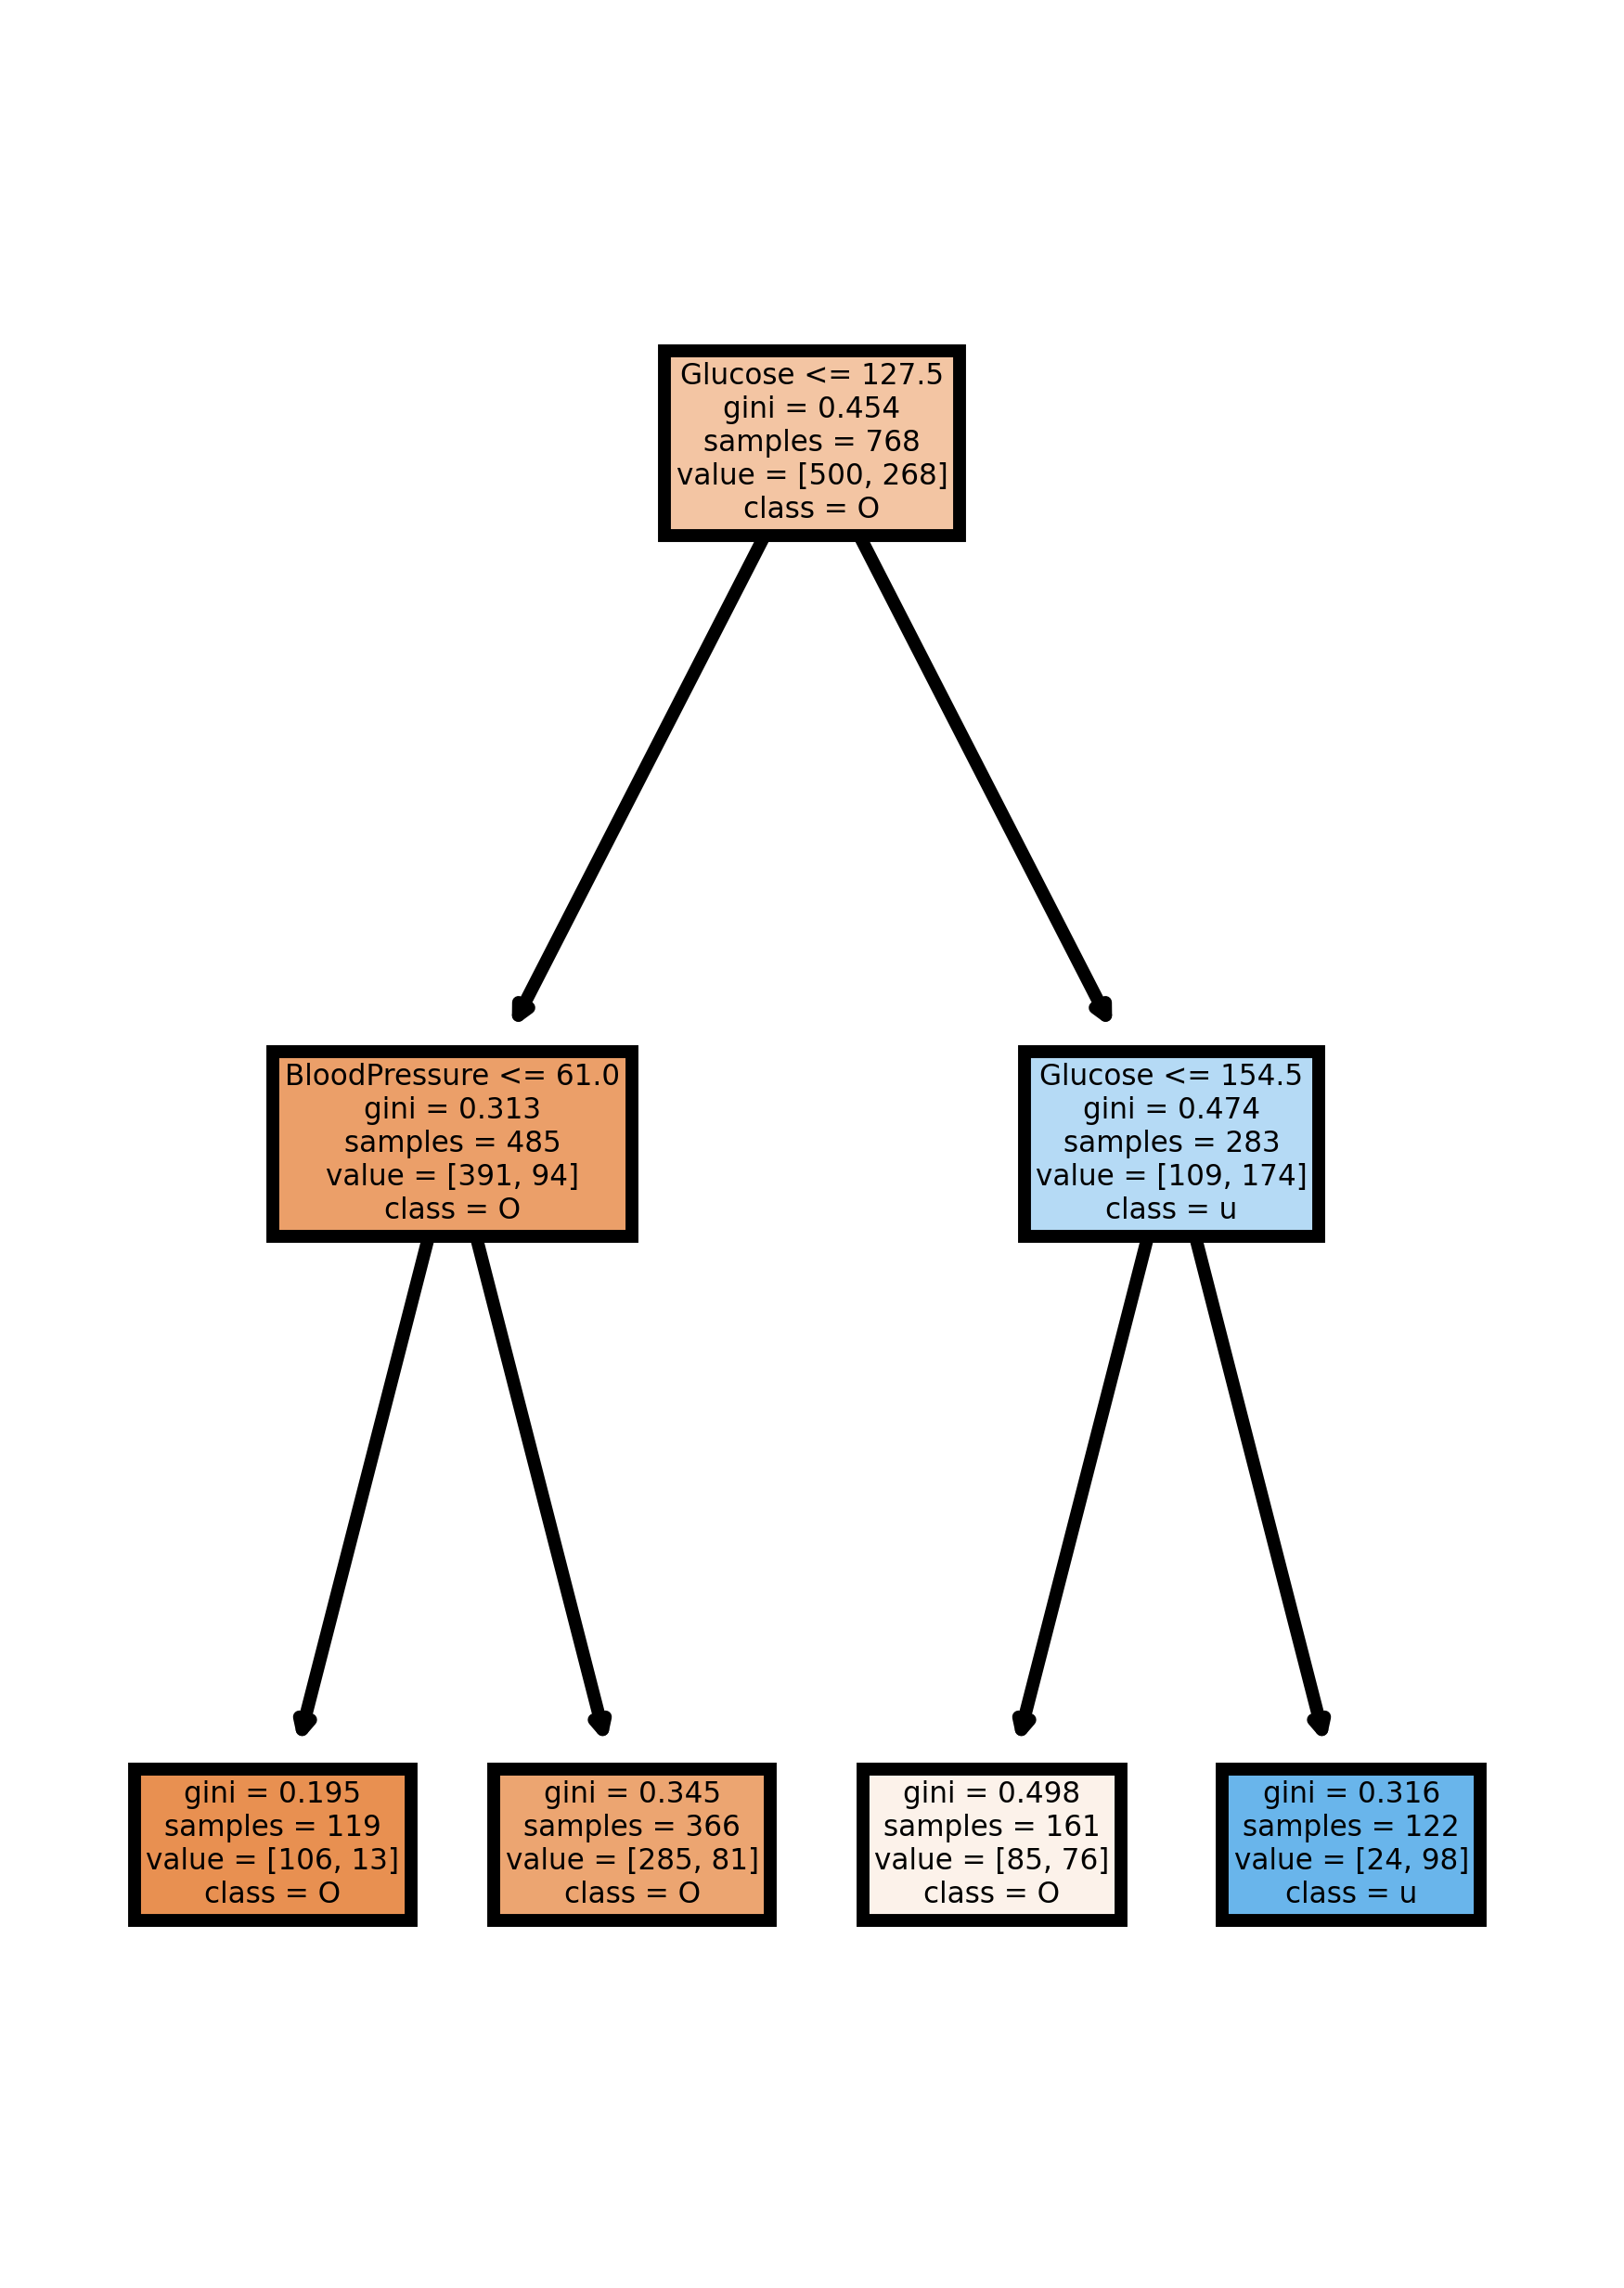

In [11]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,3), dpi=1000)

tree.plot_tree(stopGI,
           feature_names = feature_cols[:-2], 
           class_names=feature_cols[-1],
           filled = True);

fig.savefig('imagename.png')

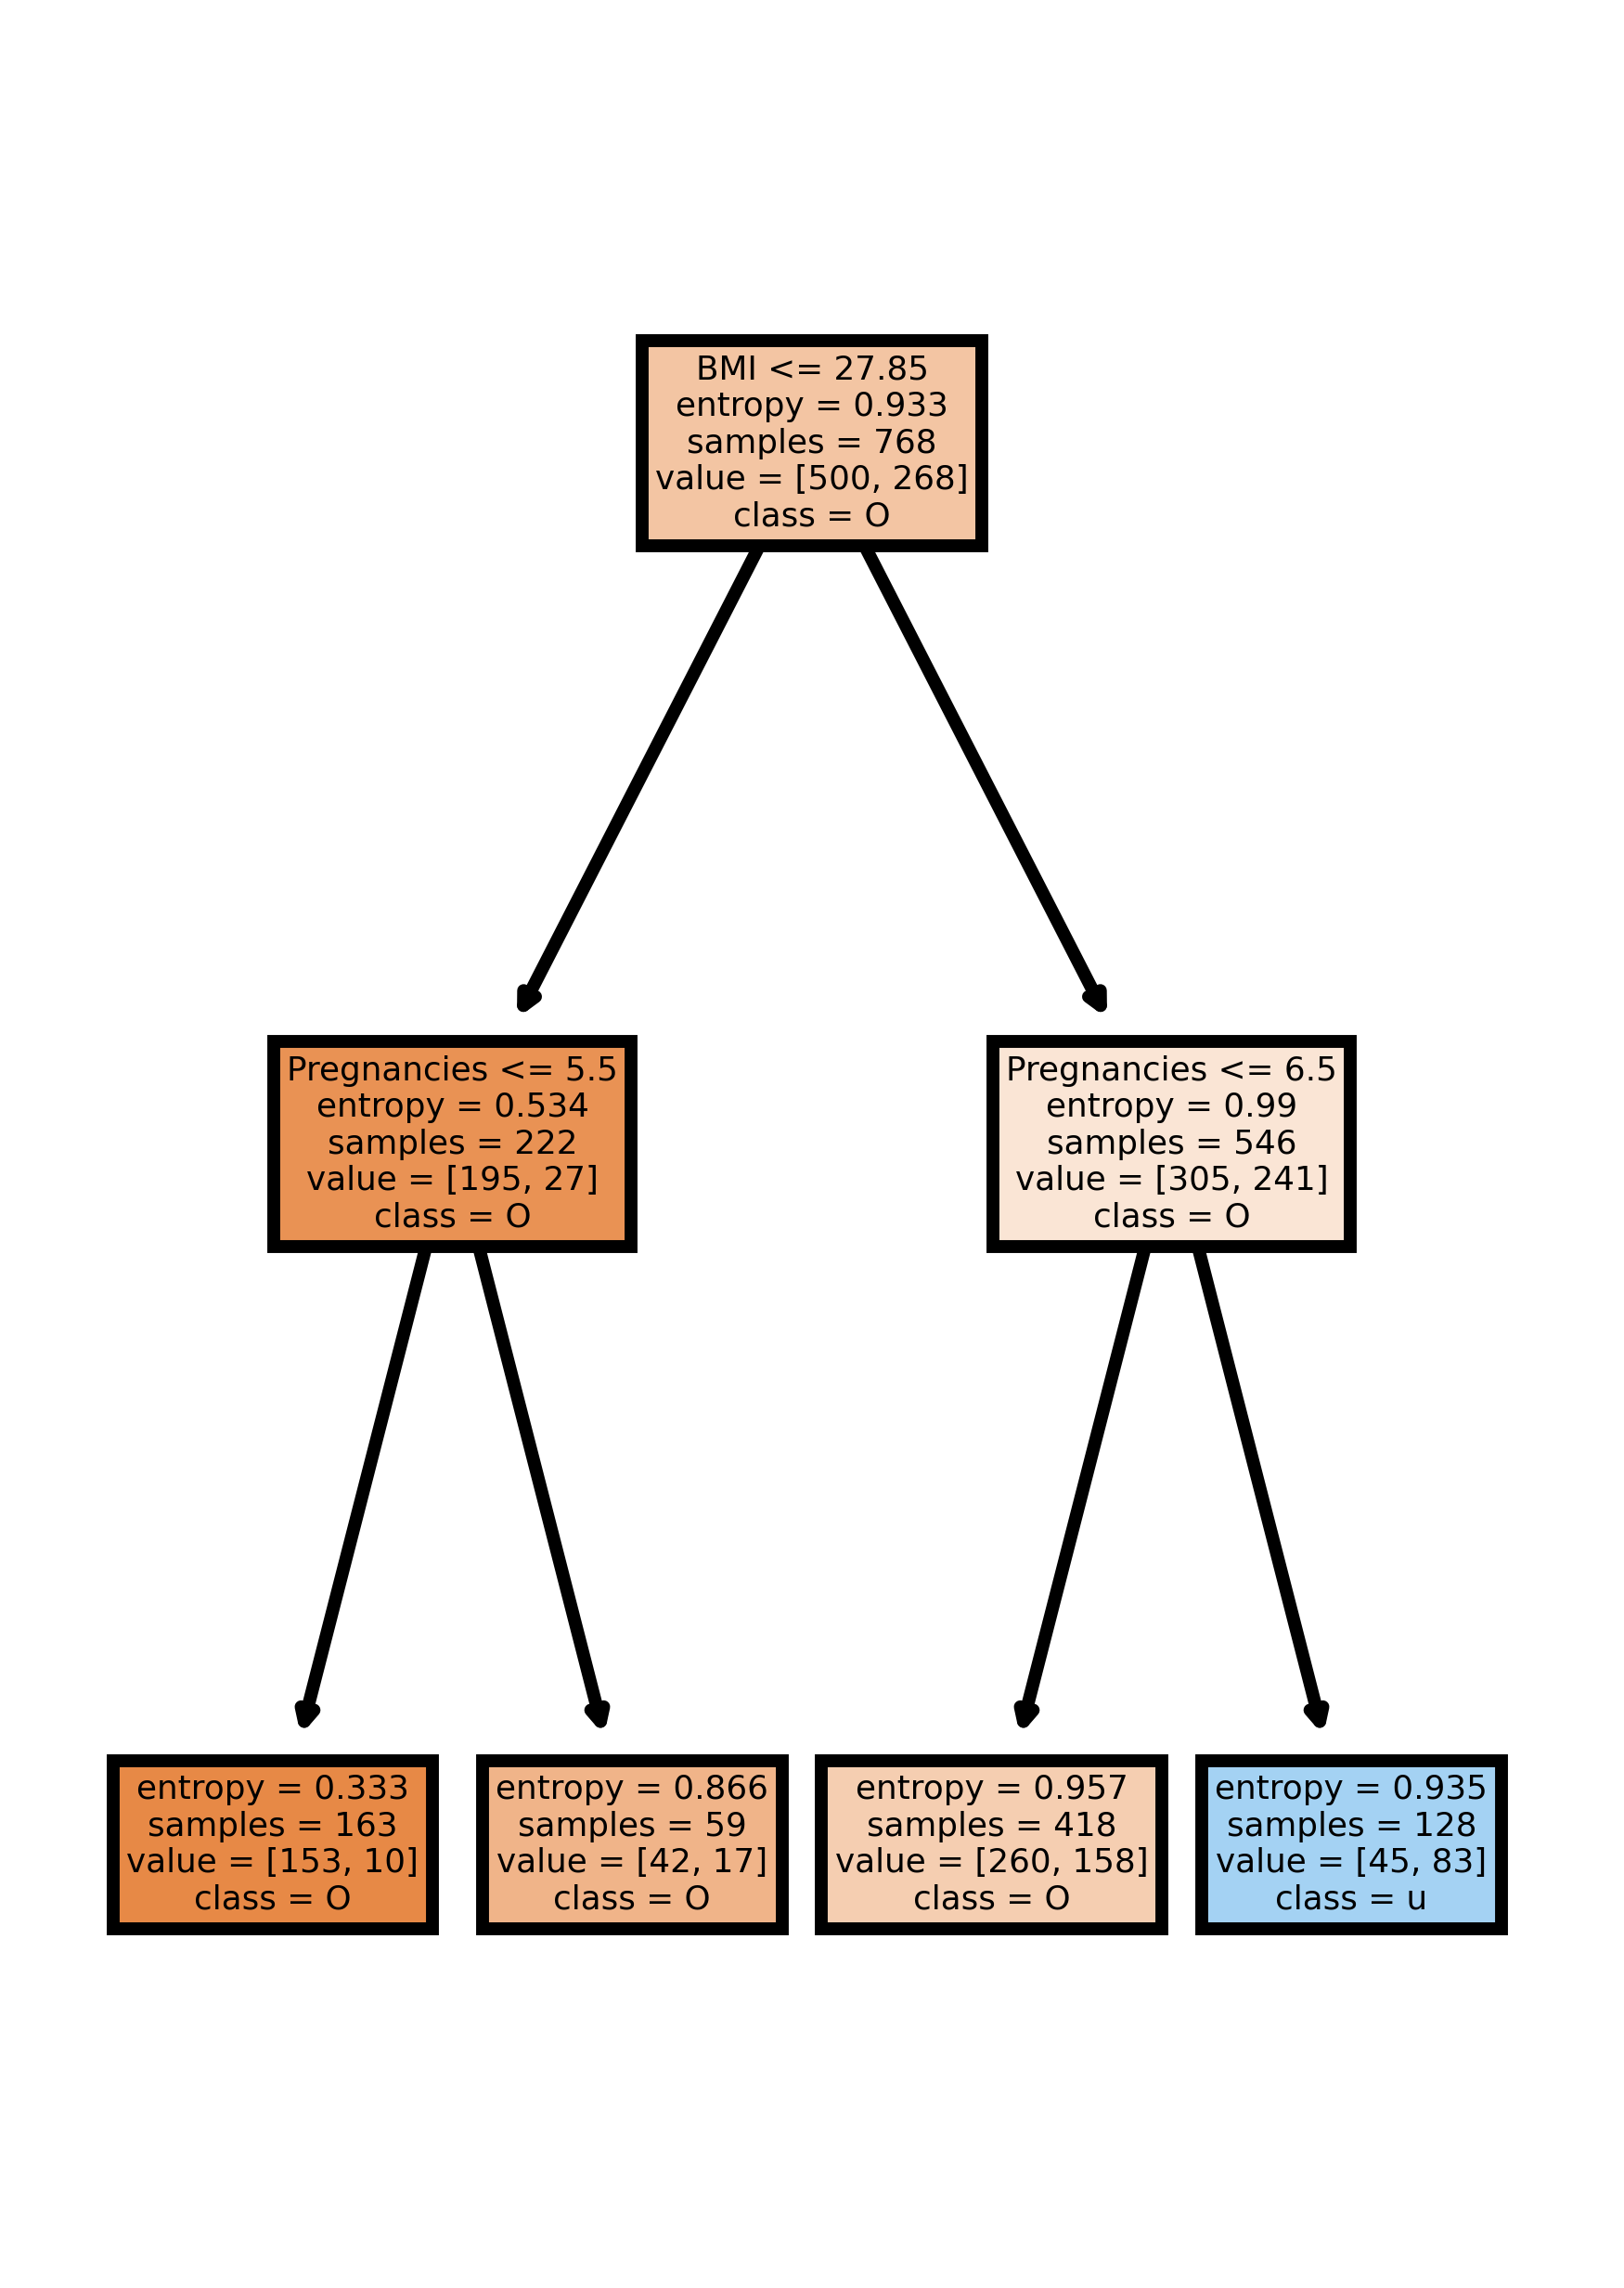

In [12]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,3), dpi=1000)

tree.plot_tree(stopIG,
           feature_names = feature_cols[:-2], 
           class_names=feature_cols[-1],
           filled = True);

fig.savefig('imagename.png')